In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df= pd.read_excel("combined_data.xlsm")
df

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)"
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,143.000,10662
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,152.000,5755
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,277.000,99317
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,1153.000,507938
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,607.000,39944
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,123.000,9560
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,1344.000,234658
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,3956.000,257118
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,73.000,11117
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,274.000,391971


In [ ]:
# Calculate rainfall deviation
df['rainfall_deviation'] = (df['actual_rainfall_in_mm'] - df['normal_rainfall_in_mm']) / df['normal_rainfall_in_mm']
df

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),Fisheries_sector_damage_(in_INR_lakh),"livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)",rainfall_deviation
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,143.000,10662,1.632394
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,152.000,5755,1.489756
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,277.000,99317,1.168699
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,1153.000,507938,0.772661
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,607.000,39944,0.604145
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,123.000,9560,1.804665
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,1344.000,234658,0.615500
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,3956.000,257118,0.669393
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,73.000,11117,1.542840
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,274.000,391971,1.311409


In [ ]:
# Step 1: Per capita columns
df['fatalities_pc'] = df['fatalities_(lives_lost)'] / df['Mid_year_population']
df['damaged_houses_pc'] = df['total_damaged_houses_(partially_or_fully)'] / df['Mid_year_population']
df['crop_damage_pc'] = df['total_crop_sector_damage_(in_INR_crore)'] * 1e7 / df['Mid_year_population']  # crore → INR
df['fisheries_damage_pc'] = df['Fisheries_sector_damage_(in_INR_lakh)'] * 1e5 / df['Mid_year_population']  # lakh → INR
df['livestock_loss_pc'] = df['livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)'] / df['Mid_year_population']
df['camps_pc'] = df['no_of_camps'] / df['Mid_year_population']

In [ ]:
# Step 2: Min-max normalize to create *_pc_norm
cols_to_norm = [
    'fatalities_pc', 'damaged_houses_pc', 'crop_damage_pc',
    'fisheries_damage_pc', 'livestock_loss_pc', 'camps_pc',
    'no_of_landslides', 'rainfall_deviation'
]

df_normalized = df.copy()
for col in cols_to_norm:
    df_normalized[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

PCA

In [ ]:
# Step 3: PCA input features
features = [
    'fatalities_pc_norm',
    'damaged_houses_pc_norm',
    'crop_damage_pc_norm',
    'fisheries_damage_pc_norm',
    'livestock_loss_pc_norm',
    'camps_pc_norm',
    'no_of_landslides_norm',
    'rainfall_deviation_norm'
]

In [ ]:
# Step 4: Standardize and run PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_normalized[features])

pca = PCA()
pca.fit(X_scaled)


PCA()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)
explained_var = pca.explained_variance_ratio_

In [ ]:
import numpy as np

# Use enough PCs to explain ~80% variance
k = np.argmax(np.cumsum(explained_var) >= 0.8) + 1

weights_pca = {}
for feature in features:
    score = sum(
        (loadings.loc[feature, f'PC{i+1}']**2) * explained_var[i]
        for i in range(k)
    )
    weights_pca[feature] = score

# Normalize to sum = 1
total = sum(weights_pca.values())
weights_pca = {f: w/total for f, w in weights_pca.items()}

print(weights_pca)


{'fatalities_pc_norm': np.float64(0.13450109352190004), 'damaged_houses_pc_norm': np.float64(0.11856704474144106), 'crop_damage_pc_norm': np.float64(0.11768761212260055), 'fisheries_damage_pc_norm': np.float64(0.11783254335796522), 'livestock_loss_pc_norm': np.float64(0.11686499365037419), 'camps_pc_norm': np.float64(0.12403813537743952), 'no_of_landslides_norm': np.float64(0.1273925617935918), 'rainfall_deviation_norm': np.float64(0.14311601543468763)}


In [ ]:
# 3. Compute FSI with pca weights
weights = {
    'fatalities_pc_norm': 0.13450109352190004,
    'damaged_houses_pc_norm': 0.11856704474144106,
    'crop_damage_pc_norm': 0.11768761212260055,
    'fisheries_damage_pc_norm': 0.11783254335796522,
    'livestock_loss_pc_norm': 0.11686499365037419,
    'camps_pc_norm': 0.12403813537743952,
    'no_of_landslides_norm': 0.1273925617935918,
    'rainfall_deviation_norm': 0.14311601543468763
}

In [ ]:
# Only use available columns
available_cols = [col for col in weights if col in df_normalized.columns]

#adjust weights if any variables are missing
total_weight = sum(weights[col] for col in available_cols)
adjusted_weights = {col: weights[col] / total_weight for col in available_cols}

In [ ]:
# Calculate FSI
df_normalized['FSI'] = sum(
    df_normalized[col].fillna(0) * w for col, w in adjusted_weights.items()
)

In [ ]:
# Get thresholds across all years
low_thr = df_normalized['FSI'].quantile(0.33)
high_thr = df_normalized['FSI'].quantile(0.66)

def categorize(val):
    if val <= low_thr:
        return 'Low'
    elif val <= high_thr:
        return 'Medium'
    else:
        return 'High'

df_normalized['FSI_category'] = df_normalized['FSI'].apply(categorize)


In [ ]:
# Step 3: Print final output columns
output_cols = ['district', 'Year', 'FSI', 'FSI_category']
print(df_normalized[output_cols].to_string(index=False))

          district  Year      FSI FSI_category
Thiruvananthapuram  2018 0.131015       Medium
            Kollam  2018 0.121306       Medium
    Pathanamthitta  2018 0.384992         High
         Alappuzha  2018 0.425879         High
          Kottayam  2018 0.182055       Medium
            Idukki  2018 0.549425         High
         Ernakulam  2018 0.297762         High
          Thrissur  2018 0.344793         High
          Palakkad  2018 0.161589       Medium
        Malappuram  2018 0.194441         High
         Kozhikode  2018 0.090053          Low
           Wayanad  2018 0.337357         High
            Kannur  2018 0.047279          Low
        Kasaragode  2018 0.002849          Low
Thiruvananthapuram  2019 0.083483          Low
            Kollam  2019 0.075486          Low
    Pathanamthitta  2019 0.081880          Low
         Alappuzha  2019 0.090412       Medium
          Kottayam  2019 0.085742          Low
            Idukki  2019 0.072856          Low
         Erna

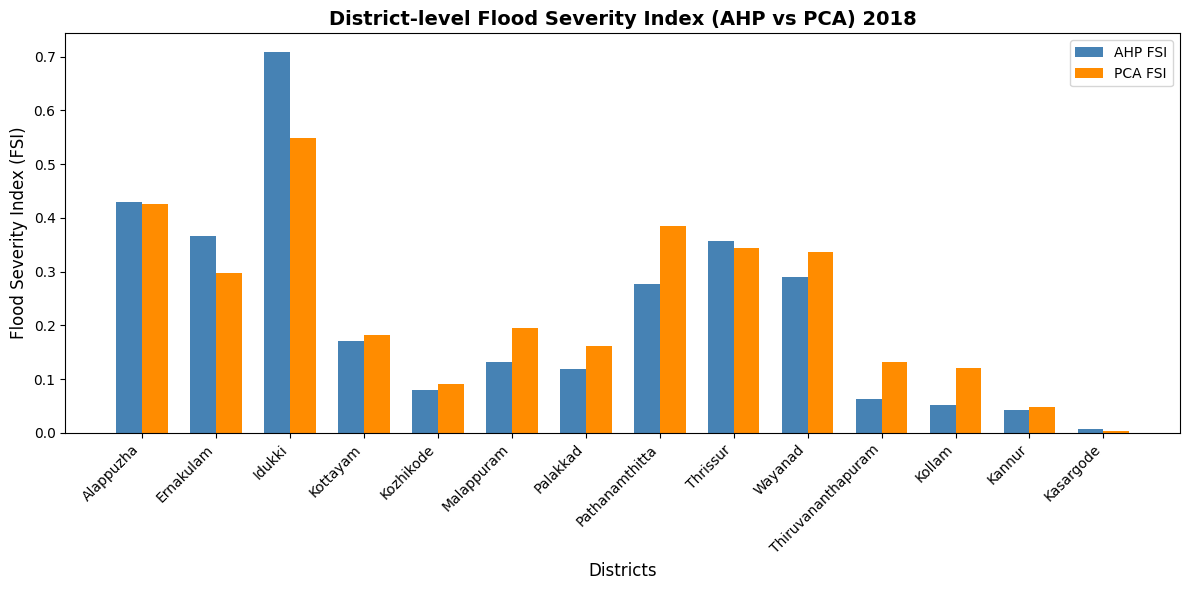

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2018
districts = ["Alappuzha", "Ernakulam", "Idukki", "Kottayam", "Kozhikode", "Malappuram", "Palakkad", "Pathanamthitta", "Thrissur", "Wayanad", "Thiruvananthapuram", "Kollam", "Kannur","Kasargode"]
ahp_fsi = [0.429816, 0.367335, 0.708202, 0.171649, 0.079542, 0.131960, 0.118448, 0.276176, 0.356845, 0.289663, 0.063784, 0.052201, 0.042993, 0.007686]
pca_fsi = [0.425879, 0.297762, 0.549425, 0.182055, 0.090053, 0.194441, 0.161589, 0.384992, 0.344793, 0.337357, 0.131015, 0.121306, 0.047279, 0.002849]

x = np.arange(len(districts))  # X locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12,6))
bars1 = ax.bar(x - width/2, ahp_fsi, width, label='AHP FSI', color='steelblue')
bars2 = ax.bar(x + width/2, pca_fsi, width, label='PCA FSI', color='darkorange')

# Formatting
ax.set_xlabel("Districts", fontsize=12)
ax.set_ylabel("Flood Severity Index (FSI)", fontsize=12)
ax.set_title("District-level Flood Severity Index (AHP vs PCA) 2018", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(districts, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


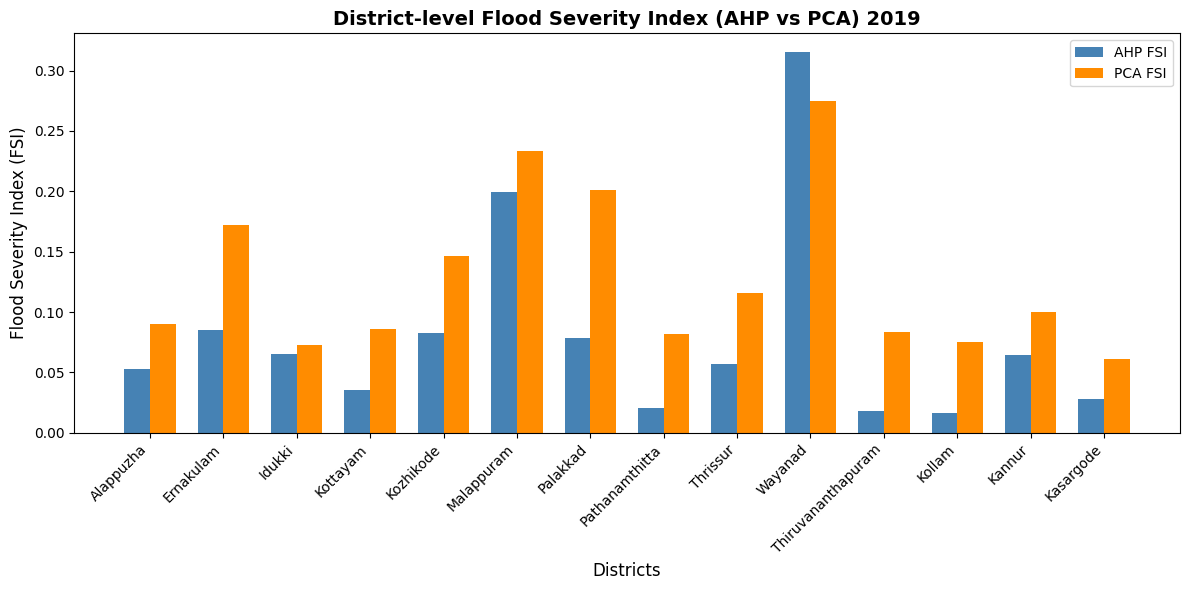

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 2019
districts = ["Alappuzha", "Ernakulam", "Idukki", "Kottayam", "Kozhikode", "Malappuram", "Palakkad", "Pathanamthitta", "Thrissur", "Wayanad", "Thiruvananthapuram", "Kollam", "Kannur","Kasargode"]
ahp_fsi = [0.053218, 0.085511, 0.065149, 0.035159, 0.082668, 0.199734, 0.078505, 0.020453, 0.057378 , 0.315108, 0.017950, 0.016850 , 0.064260, 0.027864 ]
pca_fsi = [0.090412, 0.171816, 0.072856, 0.085742, 0.146319, 0.233077, 0.200856, 0.081880, 0.116070, 0.274504, 0.083483, 0.075486 , 0.100080, 0.061066]

x = np.arange(len(districts))  # X locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12,6))
bars1 = ax.bar(x - width/2, ahp_fsi, width, label='AHP FSI', color='steelblue')
bars2 = ax.bar(x + width/2, pca_fsi, width, label='PCA FSI', color='darkorange')

# Formatting
ax.set_xlabel("Districts", fontsize=12)
ax.set_ylabel("Flood Severity Index (FSI)", fontsize=12)
ax.set_title("District-level Flood Severity Index (AHP vs PCA) 2019", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(districts, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


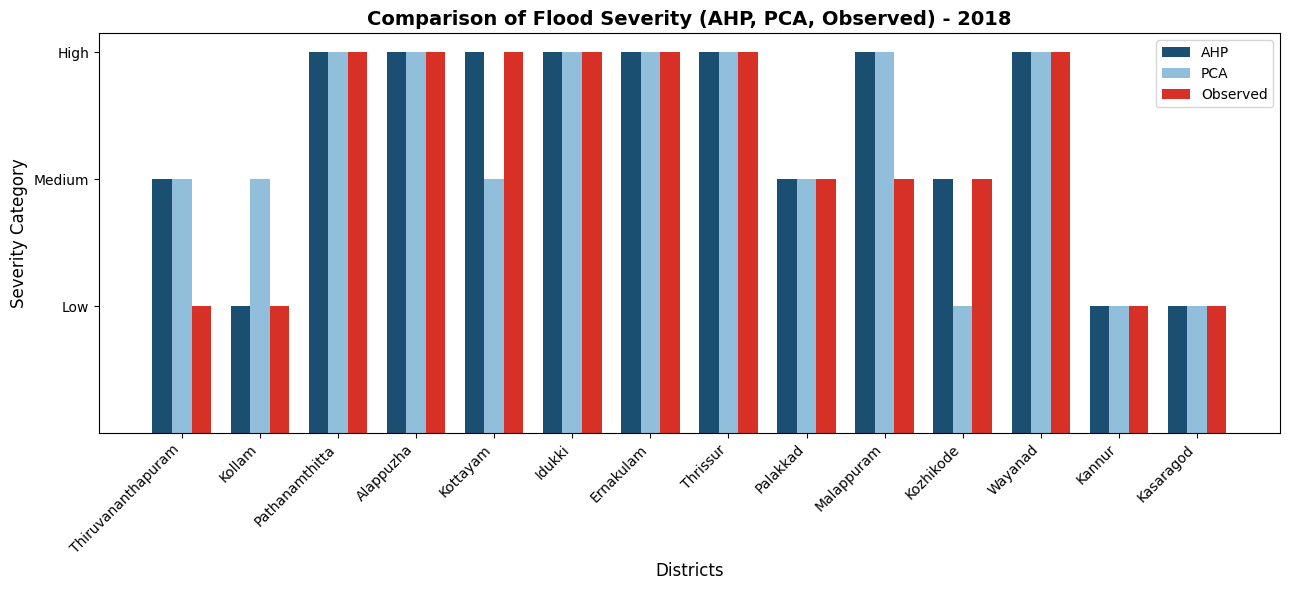

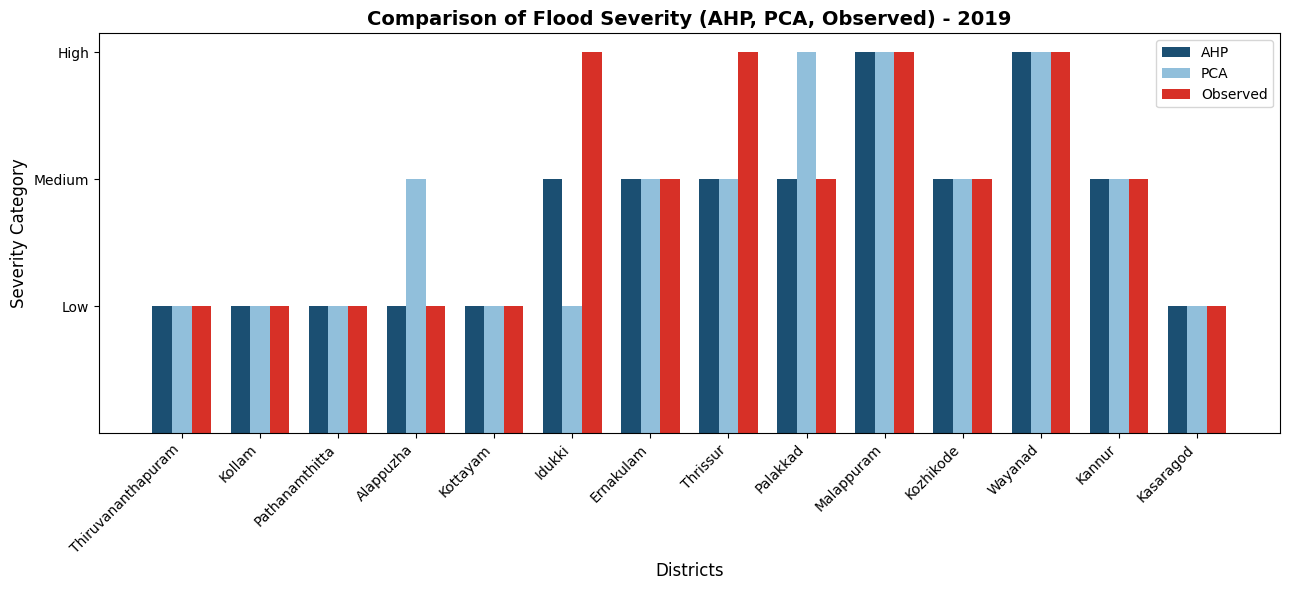

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Severity mapping
severity_map = {"Low": 1, "Medium": 2, "High": 3}

# Observed data
observed_data = {
    2018: ["Low","Low","High","High","High","High","High","High","Medium","Medium","Medium","High","Low","Low"],
    2019: ["Low","Low","Low","Low","Low","High","Medium","High","Medium","High","Medium","High","Medium","Low"]
}

districts = ["Thiruvananthapuram","Kollam","Pathanamthitta","Alappuzha","Kottayam",
             "Idukki","Ernakulam","Thrissur","Palakkad","Malappuram",
             "Kozhikode","Wayanad","Kannur","Kasaragod"]

ahp_2018 = ["Medium","Low","High","High","High","High","High","High","Medium","High","Medium","High","Low","Low"]
pca_2018 = ["Medium","Medium","High","High","Medium","High","High","High","Medium","High","Low","High","Low","Low"]
ahp_2019 = ["Low","Low","Low","Low","Low","Medium","Medium","Medium","Medium","High","Medium","High","Medium","Low"]
pca_2019 = ["Low","Low","Low","Medium","Low","Low","Medium","Medium","High","High","Medium","High","Medium","Low"]

# Convert to numeric
def to_numeric(lst): return [severity_map[s] for s in lst]

ahp_2018_n, pca_2018_n, obs_2018_n = to_numeric(ahp_2018), to_numeric(pca_2018), to_numeric(observed_data[2018])
ahp_2019_n, pca_2019_n, obs_2019_n = to_numeric(ahp_2019), to_numeric(pca_2019), to_numeric(observed_data[2019])

# Colors
colors = {
    "AHP": "#1b4f72",      # Dark muted blue
    "PCA": "#91bfdb",      # Light blue
    "Observed": "#d73027"  # Bold red
}

# Function to plot
def plot_fsi(year, ahp, pca, obs):
    x = np.arange(len(districts))
    width = 0.25

    fig, ax = plt.subplots(figsize=(13,6))
    ax.bar(x - width, ahp, width, label='AHP', color=colors["AHP"])
    ax.bar(x, pca, width, label='PCA', color=colors["PCA"])
    ax.bar(x + width, obs, width, label='Observed', color=colors["Observed"])

    ax.set_xlabel("Districts", fontsize=12)
    ax.set_ylabel("Severity Category", fontsize=12)
    ax.set_title(f"Comparison of Flood Severity (AHP, PCA, Observed) - {year}", fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(districts, rotation=45, ha="right")
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(["Low", "Medium", "High"])
    ax.legend()
    plt.tight_layout()
    plt.show()

# Plot both years
plot_fsi(2018, ahp_2018_n, pca_2018_n, obs_2018_n)
plot_fsi(2019, ahp_2019_n, pca_2019_n, obs_2019_n)


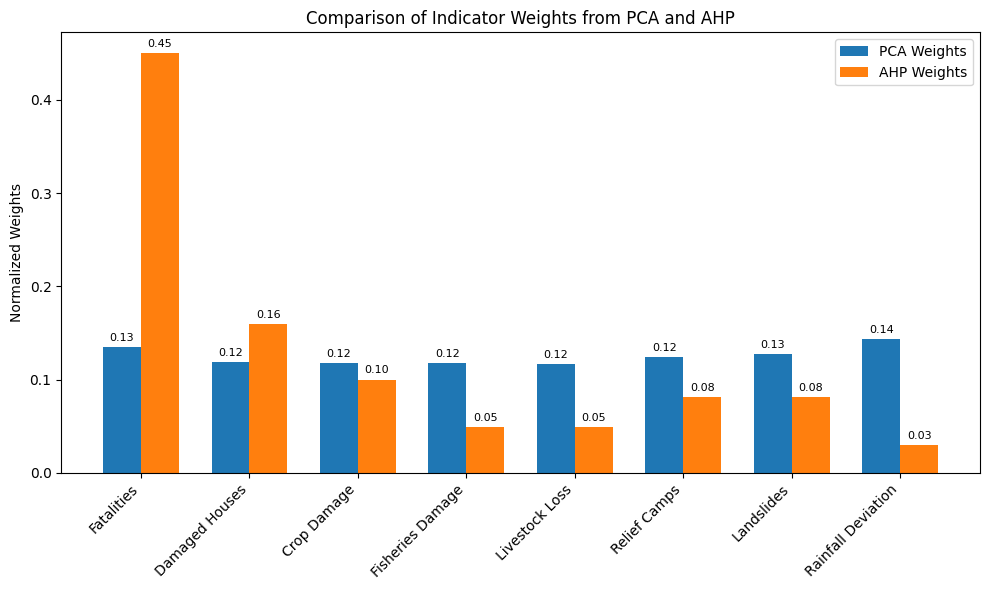

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

{'fatalities_pc_norm': 0.45, 'damaged_houses_pc_norm': 0.16, 'crop_damage_pc_norm': 0.1, 'camps_pc_norm': 0.081, 'no_of_landslides_norm': 0.081, 'fisheries_damage_pc_norm': 0.049, 'livestock_loss_pc_norm': 0.049, 'rainfall_deviation_norm': 0.03}


# Example weights (replace with your actual values)
weights_pca = {
    'Fatalities': 0.13450109352190004,
    'Damaged Houses': 0.11856704474144106,
    'Crop Damage': 0.11768761212260055,
    'Fisheries Damage': 0.11783254335796522,
    'Livestock Loss': 0.11686499365037419,
    'Relief Camps': 0.12403813537743952,
    'Landslides': 0.1273925617935918,
    'Rainfall Deviation': 0.14311601543468763
}

weights_ahp = {
    'Fatalities': 0.45,
    'Damaged Houses': 0.16,
    'Crop Damage': 0.10,
    'Fisheries Damage': 0.049,
    'Livestock Loss': 0.049,
    'Relief Camps': 0.081,
    'Landslides': 0.081,
    'Rainfall Deviation': 0.03
}

# --- Prepare data ---
indicators = list(weights_pca.keys())
pca_vals = [weights_pca[i] for i in indicators]
ahp_vals = [weights_ahp[i] for i in indicators]

x = np.arange(len(indicators))  # indicator positions
width = 0.35  # width of bars

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, pca_vals, width, label='PCA Weights')
bars2 = ax.bar(x + width/2, ahp_vals, width, label='AHP Weights')

# Labels and formatting
ax.set_ylabel('Normalized Weights')
ax.set_title('Comparison of Indicator Weights from PCA and AHP')
ax.set_xticks(x)
ax.set_xticklabels(indicators, rotation=45, ha='right')
ax.legend()

# Annotate values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# Decision Tree

In [ ]:
# Drop rows with missing target
df_dt = df_normalized.dropna(subset=['FSI_category'])

# Define features and target
features = [
    'fatalities_pc_norm',
    'damaged_houses_pc_norm',
    'crop_damage_pc_norm',
    'fisheries_damage_pc_norm',
    'livestock_loss_pc_norm',
    'camps_pc_norm',
    'no_of_landslides_norm',
    'rainfall_deviation_norm'
]

X = df_dt[features]
y = df_dt['FSI_category']

In [ ]:
# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 4, 5, 6, 8, 10, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt_base = DecisionTreeClassifier(random_state=42)

# Multiple metrics scoring
scoring = {
    'f1_macro': 'f1_macro',
    'accuracy': make_scorer(accuracy_score)
}

# RandomizedSearchCV
dt_search = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_grid,
    n_iter=30,            # increase for more thorough search
    cv=5,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    random_state=42
)

dt_search.fit(X, y_encoded)

print("✅ Best Params:", dt_search.best_params_)
print("✅ Best CV F1:", dt_search.cv_results_['mean_test_f1_macro'][dt_search.best_index_])
print("✅ Best CV Accuracy:", dt_search.cv_results_['mean_test_accuracy'][dt_search.best_index_])


✅ Best Params: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced'}
✅ Best CV F1: 0.6244444444444445
✅ Best CV Accuracy: 0.6733333333333333


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Use best found hyperparameters
best_dt = DecisionTreeClassifier(**dt_search.best_params_, random_state=42)

loo = LeaveOneOut()
y_true = []
y_pred = []

# LOOCV with tuned Decision Tree
X_np = X.to_numpy()
y_np = y_encoded

for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    best_dt.fit(X_train, y_train)
    pred = best_dt.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(pred[0])

# Decode labels back to original
y_true_labels = le.inverse_transform(y_true)
y_pred_labels = le.inverse_transform(y_pred)

# Metrics
acc = accuracy_score(y_true_labels, y_pred_labels)
f1_macro = f1_score(y_true_labels, y_pred_labels, average='macro')

print(f"\n🎯 Tuned LOOCV Accuracy: {acc:.2f}")
print(f"🎯 Tuned LOOCV Macro F1 Score: {f1_macro:.2f}\n")

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))



🎯 Tuned LOOCV Accuracy: 0.64
🎯 Tuned LOOCV Macro F1 Score: 0.65

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.60      0.63        10
         Low       0.78      0.78      0.78         9
      Medium       0.50      0.56      0.53         9

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.65        28
weighted avg       0.65      0.64      0.64        28

Confusion Matrix:
[[6 0 4]
 [1 7 1]
 [2 2 5]]


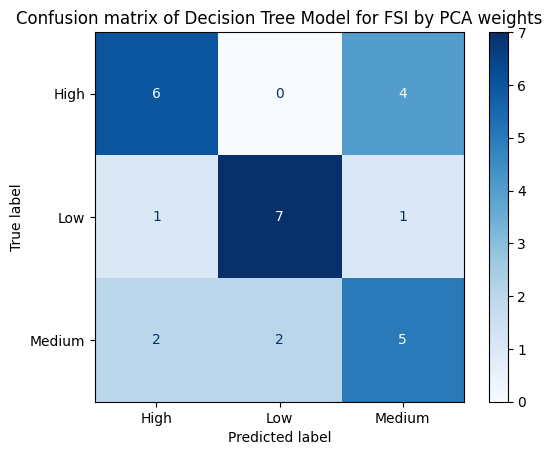

In [ ]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion matrix of Decision Tree Model for FSI by PCA weights')
plt.show()


In [ ]:
#displaying results
results_df = pd.DataFrame({
    'District': df_dt['district'].reset_index(drop=True),
    'Year': df_dt['Year'].reset_index(drop=True),
    'Actual_FSI_Category': le.inverse_transform(y_true),
    'Predicted_FSI_Category': le.inverse_transform(y_pred)
})

results_df

,District,Year,Actual_FSI_Category,Predicted_FSI_Category
0,Thiruvananthapuram,2018,Medium,Medium
1,Kollam,2018,Medium,Medium
2,Pathanamthitta,2018,High,High
3,Alappuzha,2018,High,High
4,Kottayam,2018,Medium,High
5,Idukki,2018,High,High
6,Ernakulam,2018,High,High
7,Thrissur,2018,High,Medium
8,Palakkad,2018,Medium,Low
9,Malappuram,2018,High,Medium


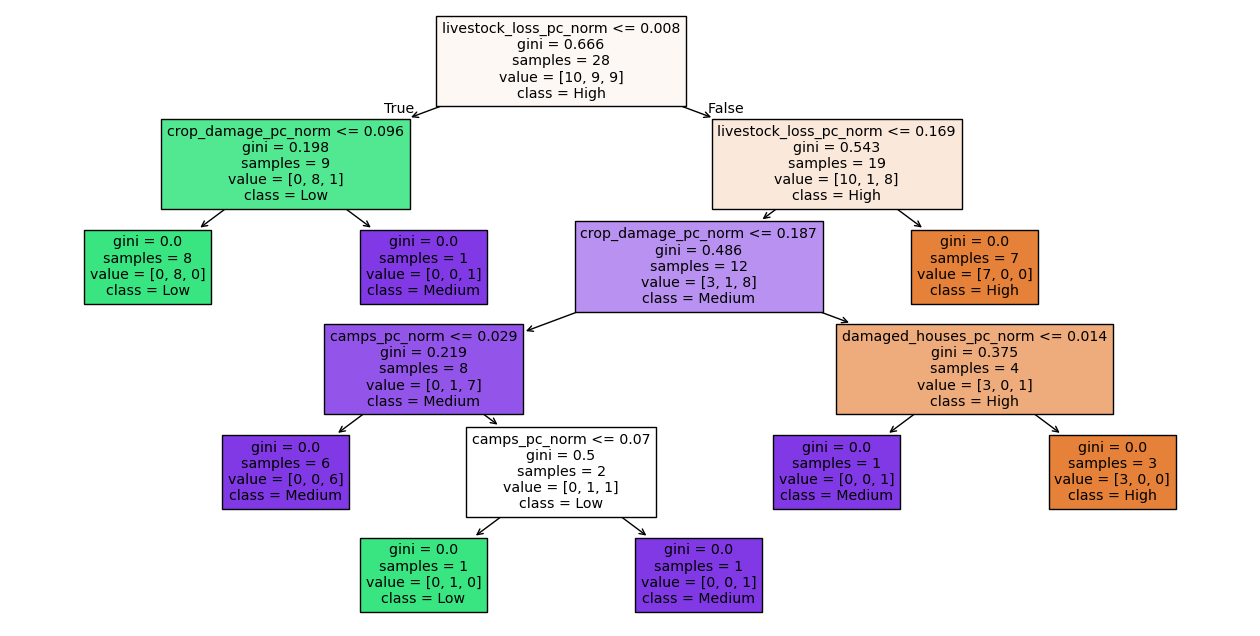

In [ ]:
clf.fit(X_np, y_np)  # Train on full data for visualization

plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=features, class_names=le.classes_, filled=True)
plt.show()


/tmp/ipython-input-3306570576.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correct', y='District', data=accuracy_by_district.sort_values('Correct'), palette='coolwarm')


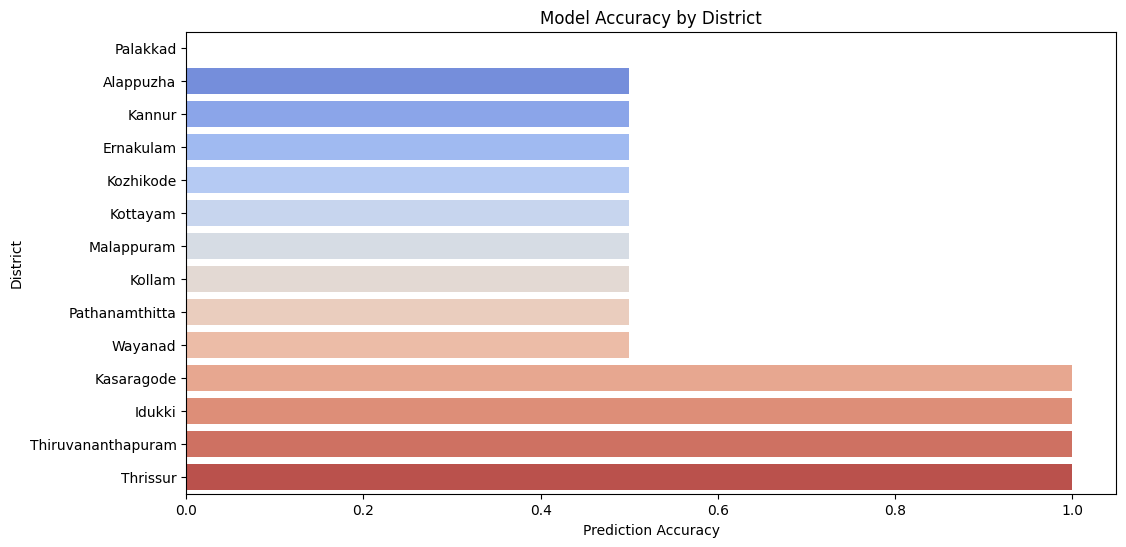

In [ ]:
import seaborn as sns
results_df['Correct'] = results_df['Actual_FSI_Category'] == results_df['Predicted_FSI_Category']
accuracy_by_district = results_df.groupby('District')['Correct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Correct', y='District', data=accuracy_by_district.sort_values('Correct'), palette='coolwarm')
plt.xlabel("Prediction Accuracy")
plt.title("Model Accuracy by District")
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_rf = df_normalized.dropna(subset=['FSI_category'])
df_rf

,district,Year,actual_rainfall_in_mm,normal_rainfall_in_mm,Mid_year_population,fatalities_(lives_lost),no_of_camps,total_damaged_houses_(partially_or_fully),no_of_landslides,total_crop_sector_damage_(in_INR_crore),...,fatalities_pc_norm,damaged_houses_pc_norm,crop_damage_pc_norm,fisheries_damage_pc_norm,livestock_loss_pc_norm,camps_pc_norm,no_of_landslides_norm,rainfall_deviation_norm,FSI,FSI_category
0,Thiruvananthapuram,2018,373.8,142.0,3355148,11,94,2572,0,113.40,...,0.066370,0.027341,0.040597,0.034941,0.013426,0.007162,0.000000,0.751099,0.131015,Medium
1,Kollam,2018,644.1,258.7,2659431,5,168,3384,2,54.60,...,0.038060,0.046942,0.017763,0.046856,0.009143,0.016634,0.013986,0.685430,0.121306,Medium
2,Pathanamthitta,2018,764.9,352.7,1172212,3,4352,17805,8,218.90,...,0.051809,0.586179,0.303804,0.193726,0.357967,1.000000,0.055944,0.537619,0.384992,High
3,Alappuzha,2018,608.2,343.1,2146033,43,2126,40922,0,353.80,...,0.405621,0.736496,0.266152,0.440460,1.000000,0.266552,0.000000,0.355289,0.425879,High
4,Kottayam,2018,619.2,386.0,1983573,14,788,17108,29,71.00,...,0.142879,0.331827,0.044030,0.250873,0.085080,0.106657,0.202797,0.277706,0.182055,Medium
5,Idukki,2018,1478.9,527.3,1093156,54,363,8496,143,588.80,...,1.000000,0.298781,0.909380,0.092244,0.036949,0.089089,1.000000,0.830410,0.549425,High
6,Ernakulam,2018,648.3,401.3,3427659,58,1582,88671,0,129.30,...,0.342546,1.000000,0.047349,0.321451,0.289243,0.123976,0.000000,0.282934,0.297762,High
7,Thrissur,2018,734.7,440.1,3243170,72,1513,24453,26,197.40,...,0.449419,0.289786,0.087179,1.000000,0.334957,0.125318,0.181818,0.307746,0.344793,High
8,Palakkad,2018,848.8,333.8,2952254,20,165,8073,20,108.60,...,0.137140,0.103593,0.045737,0.020271,0.015910,0.014672,0.139860,0.709869,0.161589,Medium
9,Malappuram,2018,913.7,395.3,4494998,30,213,7630,30,161.30,...,0.135108,0.063409,0.044186,0.049973,0.368426,0.012381,0.209790,0.603321,0.194441,High


In [ ]:
# 2. Define your features and target
features = [
    'fatalities_(lives_lost)',
    'no_of_camps',
    'total_damaged_houses_(partially_or_fully)',
    'no_of_landslides',
    'total_crop_sector_damage_(in_INR_crore)',
    'Fisheries_sector_damage_(in_INR_lakh)',
    'livestock_loss_(cows,buffalo,sheep/goat,poultry,pig,quail,heifer)',
    'rainfall_deviation'
]

X1 = df_rf[features]
y1 = df_rf['FSI_category']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Encode the target labels
le = LabelEncoder()
y1_encoded = le.fit_transform(y1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf_base = RandomForestClassifier(random_state=42)

# 2. Multiple metrics
scoring = {
    'f1_macro': 'f1_macro',
    'accuracy': make_scorer(accuracy_score)
}

# 3. Run RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=20,       # can increase to 50+ if you want thorough search
    cv=5,
    scoring=scoring,
    refit='f1_macro',   # refit using best f1_macro
    n_jobs=-1,
    random_state=42
)

random_search.fit(X1, y1_encoded)

print("✅ Best Params:", random_search.best_params_)
print("✅ Best mean F1 (CV):", random_search.cv_results_['mean_test_f1_macro'][random_search.best_index_])
print("✅ Best mean Accuracy (CV):", random_search.cv_results_['mean_test_accuracy'][random_search.best_index_])


✅ Best Params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
✅ Best mean F1 (CV): 0.6933333333333334
✅ Best mean Accuracy (CV): 0.76


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score

# 1. Get best params and create final model
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)

# 2. Run LOOCV
loo = LeaveOneOut()
y1_true, y1_pred = [], []

for train_idx, test_idx in loo.split(X1):
    X1_train, X1_test = X1.iloc[train_idx], X1.iloc[test_idx]
    y1_train, y1_test = y1_encoded[train_idx], y1_encoded[test_idx]

    best_rf.fit(X1_train, y1_train)
    y1_pred.append(best_rf.predict(X1_test)[0])
    y1_true.append(y1_test[0])

# 3. Evaluate
print("🎯 LOOCV Accuracy:", accuracy_score(y1_true, y1_pred))
print("🎯 LOOCV Macro F1:", f1_score(y1_true, y1_pred, average='macro'))


🎯 LOOCV Accuracy: 0.8214285714285714
🎯 LOOCV Macro F1: 0.8263366750208855


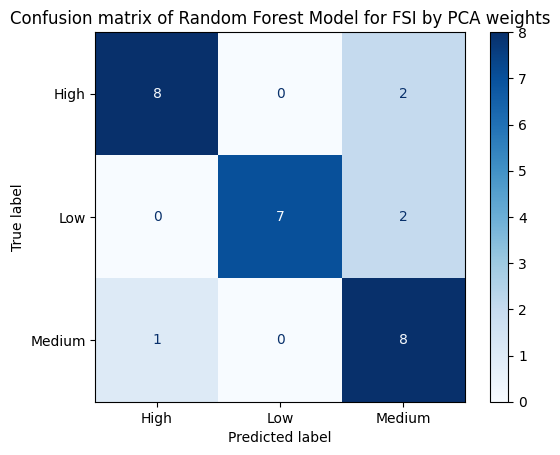

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y1_true, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion matrix of Random Forest Model for FSI by PCA weights')
plt.show()
